<a href="https://colab.research.google.com/github/Statistically-Inclined/Complete-ML/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [184]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [185]:
print("Shape of Train: {}".format(train.shape))
print("Shape of Test: {}".format(test.shape))

Shape of Train: (60000, 785)
Shape of Test: (10000, 785)


In [186]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
print(train.columns)
print(test.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


In [189]:
X_train = train.drop('label', axis=1)
y_train = train['label']

In [190]:
X_test = test.drop('label', axis=1)
y_test = test['label']

In [191]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [192]:
y_train.shape, y_test.shape

((60000,), (10000,))

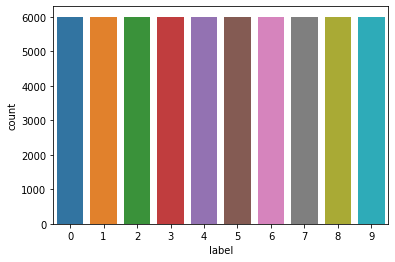

In [193]:
sns.countplot(train['label'])

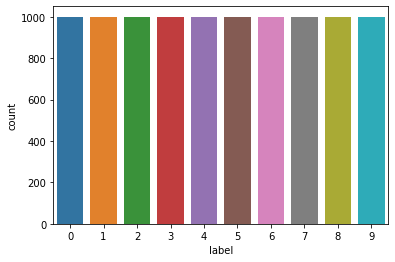

In [194]:
sns.countplot(test['label'])

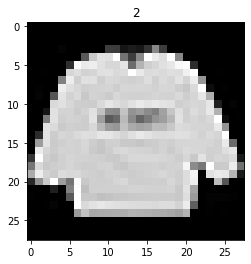

In [196]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(y_train[0])
plt.imshow(X_train.values.reshape(60000,28,28)[0],cmap="gray")

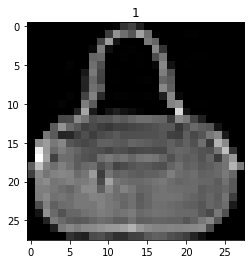

In [197]:
# plot some samples
plt.figure(figsize=(4,4))
plt.title(y_train[29])
plt.imshow(X_train.values.reshape(60000,28,28)[20],cmap="gray")

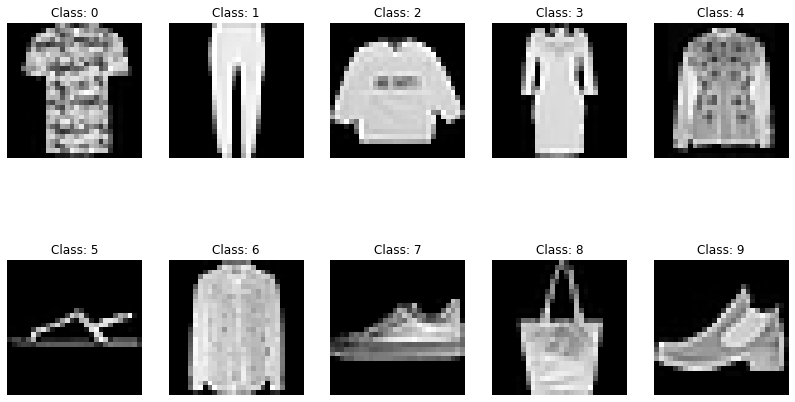

In [199]:
plt.figure(figsize = (14,8))

for i in range(10):
    plt.subplot(2, 5, i+1)
    img = train[train.label == i].iloc[0, 1:].values
    img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("Class: " + str(i))
    plt.axis('off')
    
plt.show()

In [200]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[0].shape

In [201]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [202]:
X_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [203]:
X_train = X_train.values.reshape(len(X_train), 28, 28, 1)
X_test = X_test.values.reshape(len(X_test), 28, 28, 1)

In [204]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [205]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [206]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [207]:
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_train, y_train, test_size=0.2, random_state=1234, stratify=y_train)

In [208]:
print(X_train_model.shape, X_test_model.shape, y_train_model.shape, y_test_model.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (48000, 10) (12000, 10)


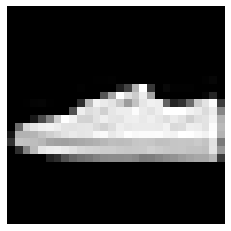

In [209]:
# Some examples
plt.imshow(X_train_model[10].reshape(28,28),cmap="gray")
plt.axis("off")
plt.show()

In [210]:
from keras.models import load_model
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization

In [211]:
#0. Intitializing the Model
model = Sequential()

#1. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', input_shape=(28, 28, 1)))
model.add(BatchNormalization()) # Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers.
model.add(Activation("relu"))

#2. LAYER
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#3. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

#4. LAYER
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same'))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

#FULLY CONNECTED LAYER
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))


In [212]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)       

In [213]:
# compiling the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [214]:
# Save the best weights
model_checkpoint = ModelCheckpoint(filepath="fashion_mnist_model_1.h5", verbose=1, save_best_only=True)

In [91]:
# Early stoppings
callbacks = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [215]:
history_1 = model.fit(X_train_model, y_train_model, validation_data=(X_test_model, y_test_model), batch_size=50, epochs=2, callbacks=[callbacks, model_checkpoint] ) 

Epoch 1/2
960/960 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8700
Epoch 1: val_loss improved from inf to 0.28223, saving model to fashion_mnist_model_1.h5
960/960 [==============================] - 244s 253ms/step - loss: 0.3600 - accuracy: 0.8700 - val_loss: 0.2822 - val_accuracy: 0.8948
Epoch 2/2
960/960 [==============================] - ETA: 0s - loss: 0.2341 - accuracy: 0.9128
Epoch 2: val_loss improved from 0.28223 to 0.23526, saving model to fashion_mnist_model_1.h5
960/960 [==============================] - 251s 261ms/step - loss: 0.2341 - accuracy: 0.9128 - val_loss: 0.2353 - val_accuracy: 0.9139


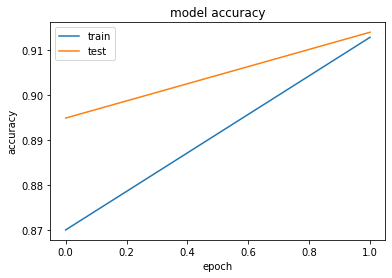

In [216]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

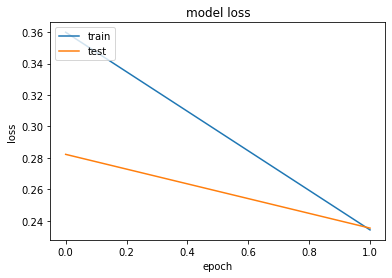

In [217]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [223]:
print('Train accuracy of the First model: ',history_1.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history_1.history['val_accuracy'][-1])
print('Train loss of the First model: ',history_1.history['loss'][-1])
print('Validation loss of the First model: ',history_1.history['val_loss'][-1])

Train accuracy of the First model:  0.9127916693687439
Validation accuracy of the First model:  0.9139166474342346
Train loss of the First model:  0.23411588370800018
Validation loss of the First model:  0.23526407778263092


In [224]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.21966338157653809
Test Accuracy: 0.9182999730110168


In [225]:
saved_model = load_model('fashion_mnist_model_1.h5')
y_test_pred = saved_model.predict(X_test)
y_test_pred

array([[9.9461693e-01, 1.8613225e-06, 1.8904659e-03, ..., 2.3000975e-06,
        6.2914281e-05, 1.0774543e-06],
       [4.1593651e-07, 9.9999774e-01, 2.4591046e-07, ..., 8.7804883e-09,
        2.9886944e-08, 1.9150375e-09],
       [7.3077758e-03, 7.0849751e-06, 8.6641073e-01, ..., 2.4685471e-07,
        6.2447012e-05, 3.6495726e-06],
       ...,
       [8.5421175e-07, 8.1837179e-08, 2.0529776e-06, ..., 3.8197740e-08,
        9.9999678e-01, 1.4370720e-09],
       [1.2373937e-04, 1.4126614e-04, 6.6670850e-06, ..., 4.7579277e-07,
        9.9939883e-01, 1.7777349e-05],
       [4.4407023e-04, 9.9241418e-01, 1.4552812e-03, ..., 5.5778619e-06,
        7.6714333e-04, 6.7519977e-05]], dtype=float32)

In [227]:
y_test_pred = np.argmax(y_test_pred, 1)
y_test_pred

array([0, 1, 2, ..., 8, 8, 1])

In [228]:
y_test

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,1,0,0,0
9997,0,0,0,0,0,0,0,0,1,0
9998,0,0,0,0,0,0,0,0,1,0


In [230]:
y_test = y_test.values
y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [250]:
y_test_true = np.argmax(y_test, axis=1)
y_test_true

array([0, 1, 2, ..., 8, 8, 1])

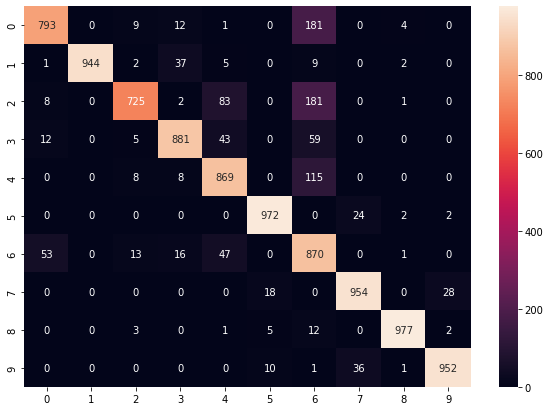

In [251]:
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [252]:
accuracy = accuracy_score(y_test_true, y_test_pred)
class_report = classification_report(y_test_true, y_test_pred)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

accuracy: 0.8937
classification report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      1000
           1       1.00      0.94      0.97      1000
           2       0.95      0.72      0.82      1000
           3       0.92      0.88      0.90      1000
           4       0.83      0.87      0.85      1000
           5       0.97      0.97      0.97      1000
           6       0.61      0.87      0.72      1000
           7       0.94      0.95      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.89      0.90     10000



### Using Image Data Generator

In [235]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,               # set input mean to 0 over the dataset
        samplewise_center=False,                # set each sample mean to 0
        featurewise_std_normalization=False,    # divide inputs by std of the dataset
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # dimesion reduction
        rotation_range=0.1,                     # randomly rotate images in the range
        zoom_range = 0.1,                       # Randomly zoom image
        width_shift_range=0.1,                  # randomly shift images horizontally
        height_shift_range=0.1,                 # randomly shift images vertically
        horizontal_flip=True,                   # randomly flip images
        vertical_flip=True)                     # randomly flip images

datagen.fit(X_train_model)

In [236]:
history_2 = model.fit_generator(datagen.flow(X_train_model, y_train_model, batch_size=100), shuffle=True, epochs=2, validation_data=(X_test_model, y_test_model),verbose=2, 
                              steps_per_epoch=X_train_model.shape[0]//100)

Epoch 1/2
480/480 - 277s - loss: 0.5253 - accuracy: 0.8108 - val_loss: 0.3302 - val_accuracy: 0.8827 - 277s/epoch - 577ms/step
Epoch 2/2
480/480 - 259s - loss: 0.4000 - accuracy: 0.8540 - val_loss: 0.3019 - val_accuracy: 0.8868 - 259s/epoch - 540ms/step


In [237]:
model.save('fashion_mnist_model_2.h5')

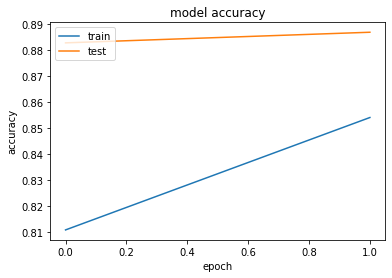

In [238]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

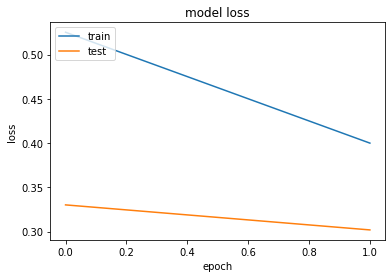

In [239]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [240]:
print('Train accuracy of the First model: ',history_2.history['accuracy'][-1])
print('Validation accuracy of the First model: ',history_2.history['val_accuracy'][-1])
print('Train loss of the First model: ',history_2.history['loss'][-1])
print('Validation loss of the First model: ',history_2.history['val_loss'][-1])

Train accuracy of the First model:  0.8540416955947876
Validation accuracy of the First model:  0.8868333101272583
Train loss of the First model:  0.39998742938041687
Validation loss of the First model:  0.3018905520439148


In [241]:
score = model.evaluate(X_test,y_test, verbose=0)
print("Test Loss:",score[0])
print("Test Accuracy:",score[1])

Test Loss: 0.29054510593414307
Test Accuracy: 0.8937000036239624


In [242]:
saved_model = load_model('fashion_mnist_model_2.h5')
y_test_pred = saved_model.predict(X_test)
y_test_pred

array([[9.78814781e-01, 1.23872184e-07, 3.17870243e-03, ...,
        4.10268194e-06, 3.31316842e-05, 3.49501050e-07],
       [3.99564533e-06, 9.99878883e-01, 7.83936048e-06, ...,
        1.06166620e-09, 6.56510201e-06, 1.85806250e-08],
       [1.82811089e-03, 2.60399413e-09, 7.94904411e-01, ...,
        3.33980704e-10, 2.04600681e-07, 4.25275504e-09],
       ...,
       [7.04407626e-07, 3.86888459e-08, 6.25065809e-07, ...,
        2.94424094e-08, 9.99996305e-01, 9.30585298e-09],
       [1.38162868e-03, 1.28472275e-05, 9.62450576e-04, ...,
        5.26980955e-07, 9.87930179e-01, 4.71511303e-05],
       [5.63715771e-02, 2.94405460e-01, 6.74625635e-02, ...,
        3.83388135e-04, 1.32064626e-01, 1.38912098e-02]], dtype=float32)

In [243]:
y_test_pred = np.argmax(y_test_pred, 1)
y_test_pred

array([0, 1, 2, ..., 8, 8, 1])

In [246]:
y_test_true = np.argmax(y_test, axis=1)

In [247]:
y_test_true

array([0, 1, 2, ..., 8, 8, 1])

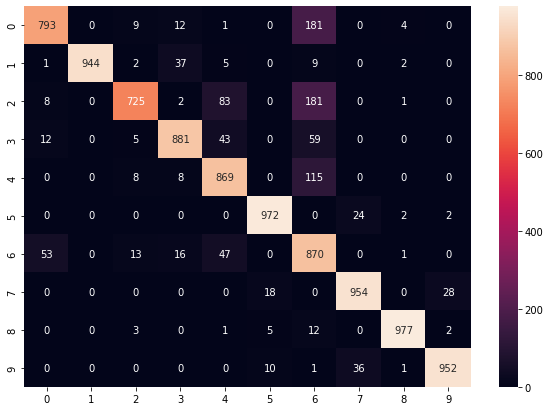

In [248]:
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test_true, y_test_pred)
sns.heatmap(cm, annot=True, fmt='g')

In [249]:
accuracy = accuracy_score(y_test_true, y_test_pred)
class_report = classification_report(y_test_true, y_test_pred)
print('accuracy:', accuracy)
print('classification report:\n', class_report)

accuracy: 0.8937
classification report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.85      1000
           1       1.00      0.94      0.97      1000
           2       0.95      0.72      0.82      1000
           3       0.92      0.88      0.90      1000
           4       0.83      0.87      0.85      1000
           5       0.97      0.97      0.97      1000
           6       0.61      0.87      0.72      1000
           7       0.94      0.95      0.95      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.89      0.90     10000

